[Reference](https://medium.com/grabngoinfo/4-clustering-model-algorithms-in-python-and-which-is-the-best-7f3431a6e624)

# Step 0: Clustering Model Algorithms
- Centroid Model uses the distance between a data point and the centroid of the cluster to group data. K-means clustering is an example of a centroid model.
- Distribution Model segments data based on their probability of belonging to the same distribution. Gaussian Mixture Model (GMM) is a popular distribution model.
- Connectivity Model uses the closeness of the data points to decide the clusters. Hierarchical Clustering Model is a widely used connectivity model.
- Density Model scans the data space and assigns clusters based on the density of data points. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density model.

# Step 1: Import Libraries

In [1]:
# Data processing 
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Dataset
from sklearn import datasets
# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

# Step 2: Read Data

In [2]:
# Load data
iris = datasets.load_iris()

# Show data information
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# Print feature and target information
print('The feature names are:', iris['feature_names'])
print('The target names are:', iris['target_names'])
print('The target values are:', iris['target'])

The feature names are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The target names are: ['setosa' 'versicolor' 'virginica']
The target values are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
# Put features data into a dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Add target to the dataframe 
df['target'] = iris.target
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
# Check counts of each category
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [6]:
# Remove target for the clustering model
X = df[df.columns.difference(['target'])]
X

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0
148,5.4,2.3,6.2,3.4


# Step 3: Decide the Number of Clusters
https://medium.com/grabngoinfo/5-ways-for-deciding-number-of-clusters-in-a-clustering-model-5db993ea5e09

# Step 4: Kmeans Clustering (Model 1)

In [7]:
# Kmeans model
kmeans = KMeans(n_clusters = 3,  random_state = 42)
# Fit and predict on the data
y_kmeans = kmeans.fit_predict(X)
# Save the predictions as a column
df['y_kmeans']=y_kmeans
# Check the distribution
df['y_kmeans'].value_counts()

0    62
1    50
2    38
Name: y_kmeans, dtype: int64

# Step 5: Hierarchical Clustering (Model 2)

In [8]:
# Hierachical clustering model
hc = AgglomerativeClustering(n_clusters = 3)
# Fit and predict on the data
y_hc = hc.fit_predict(X)
# Save the predictions as a column
df['y_hc']=y_hc
# Check the distribution
df['y_hc'].value_counts()

0    64
1    50
2    36
Name: y_hc, dtype: int64

# Step 6: Gaussian Mixture Model (GMM) (Model 3)

In [9]:
# Fit the GMM model
gmm = GaussianMixture(n_components=3, n_init=5, random_state=42)
# Fit and predict on the data
y_gmm = gmm.fit_predict(X)
# Save the prediction as a column
df['y_gmm']=y_gmm
# Check the distribution
df['y_gmm'].value_counts()

2    55
1    50
0    45
Name: y_gmm, dtype: int64

# Step 7: Density-based spatial clustering of applications with noise (DBSCAN) (Model 4)

In [10]:
# Fit the DBSCAN model
dbscan = DBSCAN(eps=0.8, min_samples=5) 
# Fit and predict on the data
y_dbscan = dbscan.fit_predict(X)
# Save the prediction as a column
df['y_dbscan'] = y_dbscan
# Check the distribution
df['y_dbscan'].value_counts()

 1    98
 0    50
-1     2
Name: y_dbscan, dtype: int64

# Step 8: Dimensionality Reduction

In [11]:
# PCA with 2 components
pca=PCA(n_components=2).fit_transform(X)

# Create columns for the 2 PCA components
df['PCA1'] = pca[:, 0]
df['PCA2'] = pca[:, 1]

# TSNE with 2 components
tsne=TSNE(n_components=2).fit_transform(X)

# Create columns for the 2 TSNE components
df['TSNE1'] = tsne[:, 0]
df['TSNE2'] = tsne[:, 1]

# Take a look at the data
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,y_kmeans,y_hc,y_gmm,y_dbscan,PCA1,PCA2,TSNE1,TSNE2
0,5.1,3.5,1.4,0.2,0,1,1,1,0,-2.684126,0.319397,12.242620,-13.248087
1,4.9,3.0,1.4,0.2,0,1,1,1,0,-2.714142,-0.177001,13.501256,-15.580833
2,4.7,3.2,1.3,0.2,0,1,1,1,0,-2.888991,-0.144949,14.319724,-14.765964
3,4.6,3.1,1.5,0.2,0,1,1,1,0,-2.745343,-0.318299,14.395226,-15.242425
4,5.0,3.6,1.4,0.2,0,1,1,1,0,-2.728717,0.326755,12.541078,-12.898697


# Step 9: Visual Comparison of Models

In [12]:
# Check label mapping
df.groupby(['target', 'y_kmeans']).size().reset_index(name='counts')

,target,y_kmeans,counts
0,0,1,50
1,1,0,48
2,1,2,2
3,2,0,14
4,2,2,36


In [14]:
# Rename labels
df['y_kmeans'] = df['y_kmeans'].map({1: 0, 0: 1, 2: 2})
# Check label mapping
df.groupby(['target', 'y_hc']).size().reset_index(name='counts')
# Rename labels
df['y_hc'] = df['y_hc'].map({1: 0, 0: 1, 2: 2})
# Check label mapping
df.groupby(['target', 'y_gmm']).size().reset_index(name='counts')
# Rename labels
df['y_gmm'] = df['y_gmm'].map({1: 0, 0: 1, 2: 2})
# Check label mapping
df.groupby(['target', 'y_dbscan']).size().reset_index(name='counts')
# Rename labels
df['y_dbscan'] = df['y_dbscan'].map({0: 0, -1: 2, 1: 1})

[Text(0.5, 1.0, 'DBSCAN')]

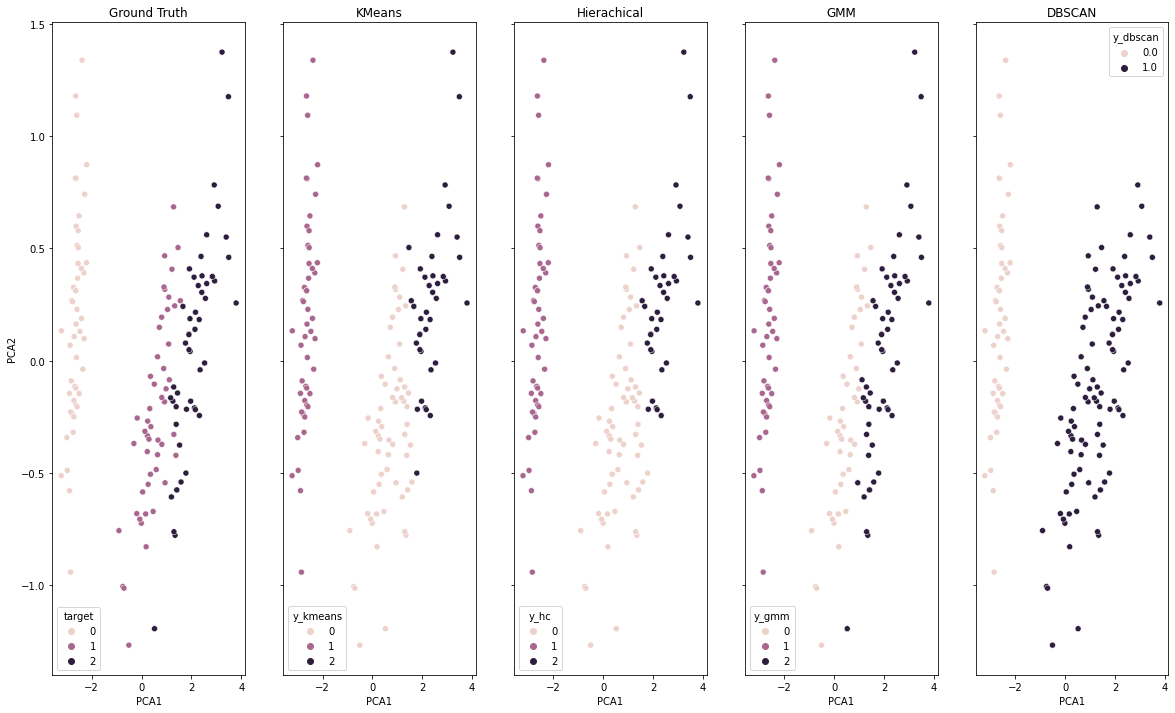

In [15]:
# Visualization using PCA
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(20,12))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='target', ax=axs[0]).set(title='Ground Truth')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_kmeans', ax=axs[1]).set(title='KMeans')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_hc', ax=axs[2]).set(title='Hierachical')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_gmm', ax=axs[3]).set(title='GMM')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_dbscan', ax=axs[4]).set(title='DBSCAN')

[Text(0.5, 1.0, 'DBSCAN')]

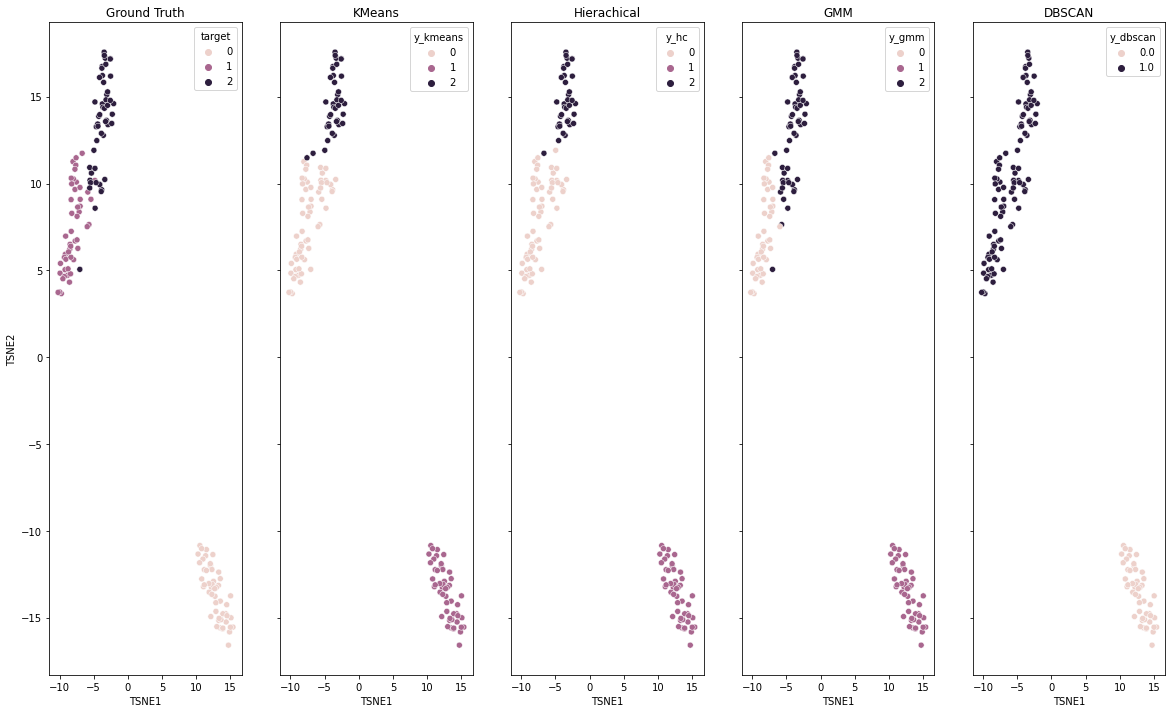

In [16]:
# Visualization using t-SNE
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(20,12))
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='target', ax=axs[0]).set(title='Ground Truth')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='y_kmeans', ax=axs[1]).set(title='KMeans')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='y_hc', ax=axs[2]).set(title='Hierachical')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='y_gmm', ax=axs[3]).set(title='GMM')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='y_dbscan', ax=axs[4]).set(title='DBSCAN')

# Step 10: Utilize Clustering Model Results for Business

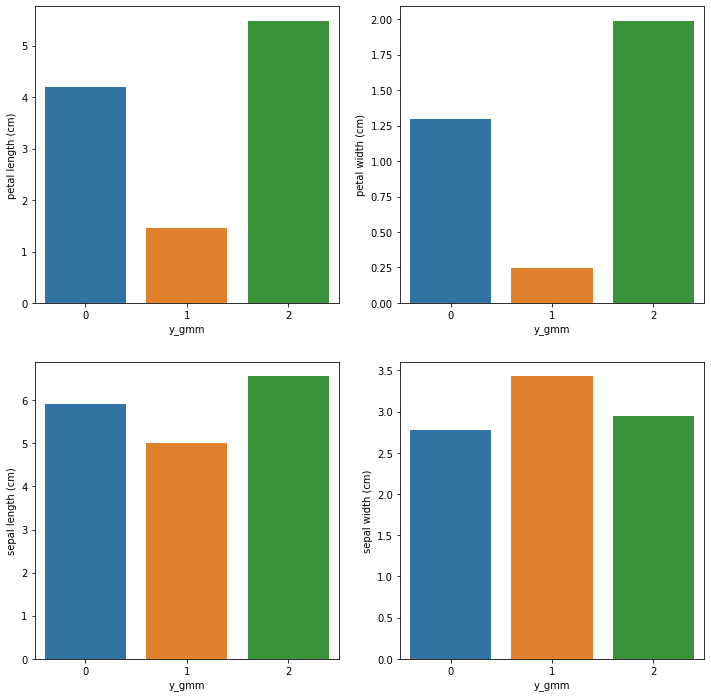

In [17]:
# Feature list
varList = ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']
# Calculate average values by predicted cluster
avg = pd.DataFrame(df.groupby(['y_gmm'])[varList].mean().reset_index())# Visualizae the average values by cluster for each feature
fig, axs = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(12,12))
sns.barplot(x='y_gmm', y=varList[0], data=avg, ax=axs[0,0])
sns.barplot(x='y_gmm', y=varList[1], data=avg, ax=axs[0,1])
sns.barplot(x='y_gmm', y=varList[2], data=avg, ax=axs[1,0])
sns.barplot(x='y_gmm', y=varList[3], data=avg, ax=axs[1,1])

# Step 11: Which Model to Use?

![pic](https://miro.medium.com/max/1400/0*gpBabeg8Opp_nHTr.webp)